# Analisis Sederhana Formasi CASN 2024
Analisis ini bertujuan untuk mengetahui karakteristik dari data yang diperoleh dari Sistem Seleksi Calon ASN 2024 yang terdiri dari `108.512` data dan `241.620` formasi. 
Data yang digunakan dalam analisis ini diambil dari [Sistem Seleksi Calon ASN 2024](https://sscasn.bkn.go.id/). Data tersebut diambil langsung dari situs web tersebut tanpa ada perubahan atau manipulasi. Data ini bersifat publik dan dapat diakses oleh siapa saja. Analisis ini hanya bertujuan untuk pembelajaran dan tidak bermaksud untuk merugikan pihak manapun.

## Import Library And Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_formasi = pd.read_csv('formasiCleaned.csv')
df_pendidikan = pd.read_csv('pendidikanCleaned.csv')

In [3]:
df_formasi = df_formasi.dropna(subset=['formasi_id'])

## Jumlah Formasi

### Jumlah Formasi Berdasarkan Instansi

Text(0.5, 1.0, 'Jumlah Formasi berdasarkan Instansi')

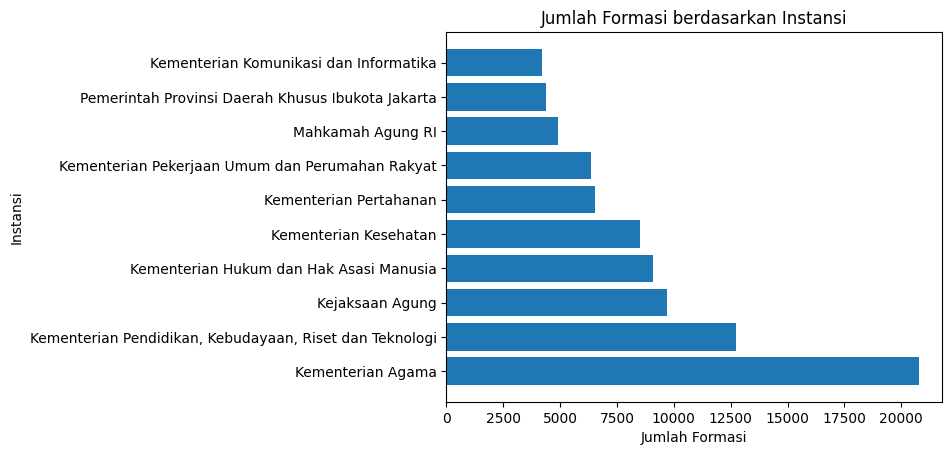

In [4]:
# Group by instansi All
sumFormasiByInstansi = df_formasi.groupby('ins_nm').sum()
sumFormasiByInstansi = sumFormasiByInstansi.sort_values(by='jumlah_formasi', ascending=False)
sumFormasiByInstansi.to_csv('output/sumFormasiByInstansi.csv')
# Just show top 10
sumFormasiByInstansiTop10 = sumFormasiByInstansi['jumlah_formasi'][:10]
sumFormasiByInstansiTop10 = sumFormasiByInstansiTop10.reset_index()
sumFormasiByInstansiTop10.columns = ['name', 'value']
sumFormasiByInstansiTop10.to_json('output/web/sumByInstansi.json', orient='records')
# Plot top 10
plt.barh(sumFormasiByInstansiTop10['name'], sumFormasiByInstansiTop10['value'])
plt.xlabel('Jumlah Formasi')
plt.ylabel('Instansi')
plt.title('Jumlah Formasi berdasarkan Instansi')

### Jumlah Formasi Berdasarkan Jabatan

Text(0.5, 1.0, 'Jumlah Formasi berdasarkan Jabatan')

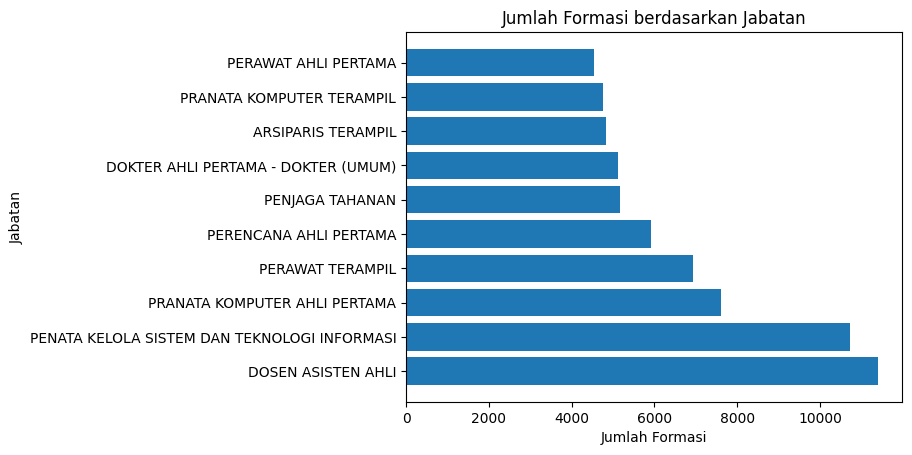

In [5]:
# Group by jabatan
sumFormasiByJabatan = df_formasi.groupby('jabatan_nm').sum()
sumFormasiByJabatan = sumFormasiByJabatan.sort_values(by='jumlah_formasi', ascending=False)
sumFormasiByJabatan.to_csv('output/sumFormasiByJabatan.csv')
# Just show top 10
sumFormasiByJabatanTop10 = sumFormasiByJabatan['jumlah_formasi'][:10]
sumFormasiByJabatanTop10 = sumFormasiByJabatanTop10.reset_index()
sumFormasiByJabatanTop10.columns = ['name', 'value']
sumFormasiByJabatanTop10.to_json('output/web/sumByJabatan.json', orient='records')
# Plot top 10
plt.barh(sumFormasiByJabatanTop10['name'], sumFormasiByJabatanTop10['value'])
plt.xlabel('Jumlah Formasi')
plt.ylabel('Jabatan')
plt.title('Jumlah Formasi berdasarkan Jabatan')

### Jumlah Formasi Berdasarkan Pendidikan

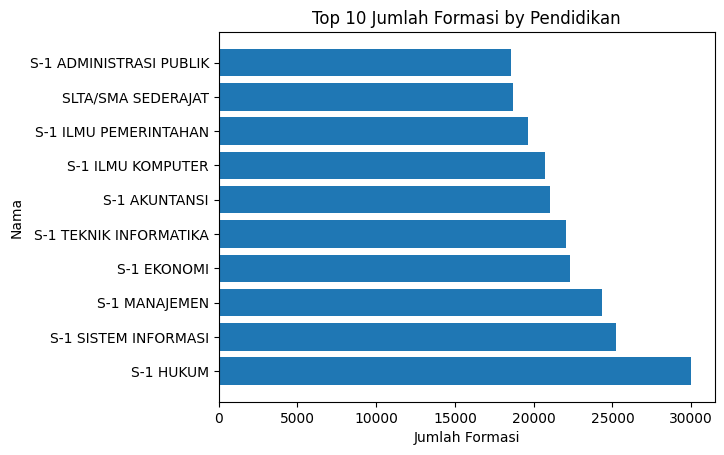

In [6]:
# Merge formasi and pendidikan, cepat_kode in kode_ref_pend
df_pendidikan_copy = df_pendidikan.copy()
df_formasi_copy = df_formasi.copy()
df_pendidikan_copy['cepat_kode'] = df_pendidikan_copy['cepat_kode'].astype(str)
df_formasi_copy['kode_ref_pend'] = df_formasi_copy['kode_ref_pend'].astype(str)
df_formasi_expanded = df_formasi_copy.assign(
    kode_ref_pend=df_formasi_copy['kode_ref_pend'].str.split(' / ')
).explode('kode_ref_pend')
filtered_formasi = df_formasi_expanded[
    df_formasi_expanded['kode_ref_pend'].isin(df_pendidikan_copy['cepat_kode'])
]
grouped_sum = filtered_formasi.groupby('kode_ref_pend')['jumlah_formasi'].sum().reset_index()
df_pendidikan_copy = df_pendidikan_copy.merge(
    grouped_sum, left_on='cepat_kode', right_on='kode_ref_pend', how='left'
)
df_pendidikan_copy['jumlah_formasi'].fillna(0, inplace=True)
sumFormasiByPendidikan = df_pendidikan_copy.sort_values(by='jumlah_formasi', ascending=False)
sumFormasiByPendidikan.to_csv('output/sumFormasiByPendidikan.csv', index=False)

# Just show top 10
sumFormasiByPendidikanTop10 = sumFormasiByPendidikan[['nama', 'jumlah_formasi']].head(10)
sumFormasiByPendidikanTop10.columns = ['name', 'value']
sumFormasiByPendidikanTop10.to_json('output/web/sumByPendidikan.json', orient='records')

# Plot top 10
plt.barh(sumFormasiByPendidikanTop10['name'], sumFormasiByPendidikanTop10['value'])
plt.xlabel('Jumlah Formasi')
plt.ylabel('Nama')
plt.title('Top 10 Jumlah Formasi by Pendidikan')
plt.show()

## Salary Min - Max

### Salary Minimum dan Maximum Berdasarkan Instansi

#### Range Salary Berdasarkan Instansi - Diurutkan Berdasarkan Salary Tertinggi

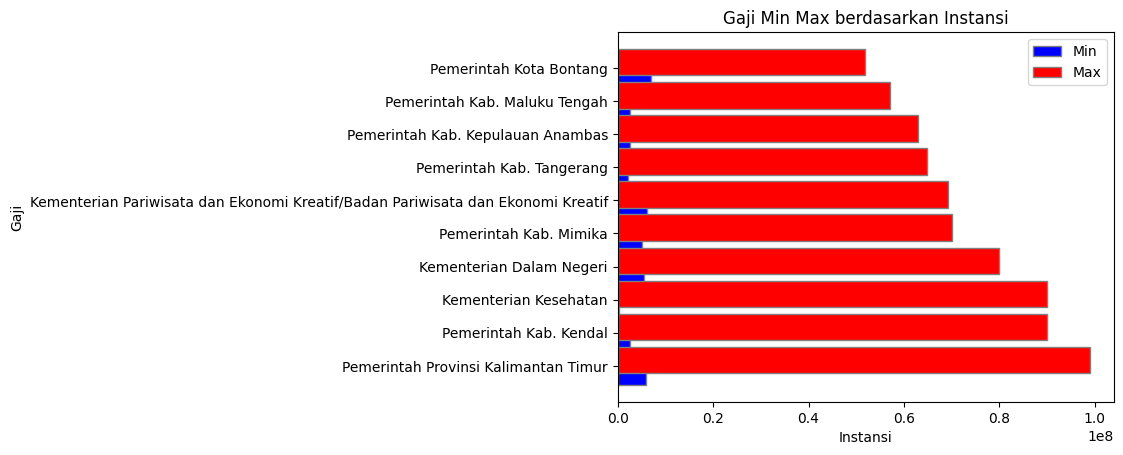

In [7]:
# group by instansi but find the min and max salary
salaryByInstansi = df_formasi.groupby('ins_nm').agg({'gaji_min':'min', 'gaji_max':'max'})
salaryByInstansi.to_csv('output/salaryMinMaxByInstansi.csv')
salaryByInstansiMax = salaryByInstansi.sort_values(by='gaji_max', ascending=False)
# just take the top 10
salaryByInstansiMax = salaryByInstansiMax[:10]
salaryByInstansiMax = salaryByInstansiMax.reset_index()
salaryByInstansiMax['name'] = salaryByInstansiMax['ins_nm']
salaryByInstansiMax['min'] = salaryByInstansiMax['gaji_min']
salaryByInstansiMax['max'] = salaryByInstansiMax['gaji_max']
salaryByInstansiMax = salaryByInstansiMax[{'name', 'min', 'max'}]
salaryByInstansiMax.to_json('output/web/salaryMinMaxByInstansiMax.json', orient='records')
# plot the graph
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(salaryByInstansiMax))
r2 = [x + barWidth for x in r1]
plt.barh(r1, salaryByInstansiMax['min'], color='b', edgecolor='grey', label='Min')
plt.barh(r2, salaryByInstansiMax['max'], color='r', edgecolor='grey', label='Max')
plt.xlabel('Instansi')
plt.ylabel('Gaji')
plt.title('Gaji Min Max berdasarkan Instansi')
plt.yticks([r + barWidth/2 for r in range(len(salaryByInstansiMax))], salaryByInstansiMax['name'])
plt.legend()
plt.show()

#### Gaji Minimum Tertinggi Berdasarkan Instansi

Text(0.5, 0, 'Juta')

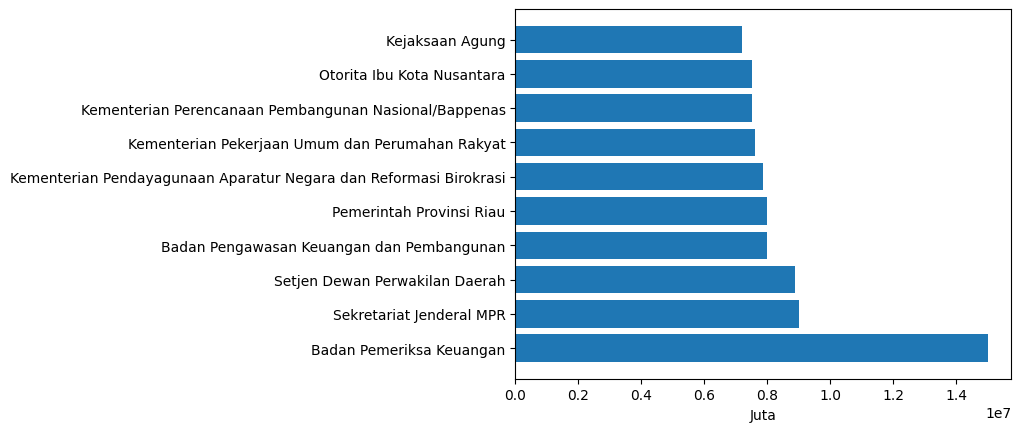

In [8]:
salaryByInstansiMin = df_formasi.groupby('ins_nm').agg({'gaji_min':'min', 'gaji_max':'max'})
salaryByInstansiMin = salaryByInstansiMin.sort_values(by='gaji_min', ascending=False)
salaryByInstansiMin = salaryByInstansiMin[:10]
salaryByInstansiMin = salaryByInstansiMin.reset_index()
salaryByInstansiMin['name'] = salaryByInstansiMin['ins_nm']
salaryByInstansiMin['value'] = salaryByInstansiMin['gaji_min']
salaryByInstansiMin = salaryByInstansiMin[{'name', 'value'}]
salaryByInstansiMin.to_json('output/web/salaryMinMaxByInstansiMin.json', orient='records')
plt.barh(salaryByInstansiMin['name'][:10], salaryByInstansiMin['value'])
plt.xlabel('Juta')

### Salary Minimun dan Maximum Berdasarkan Jabatan

#### Range Salary Berdasarkan Jabatan - Diurutkan Berdasarkan Salary Tertinggi

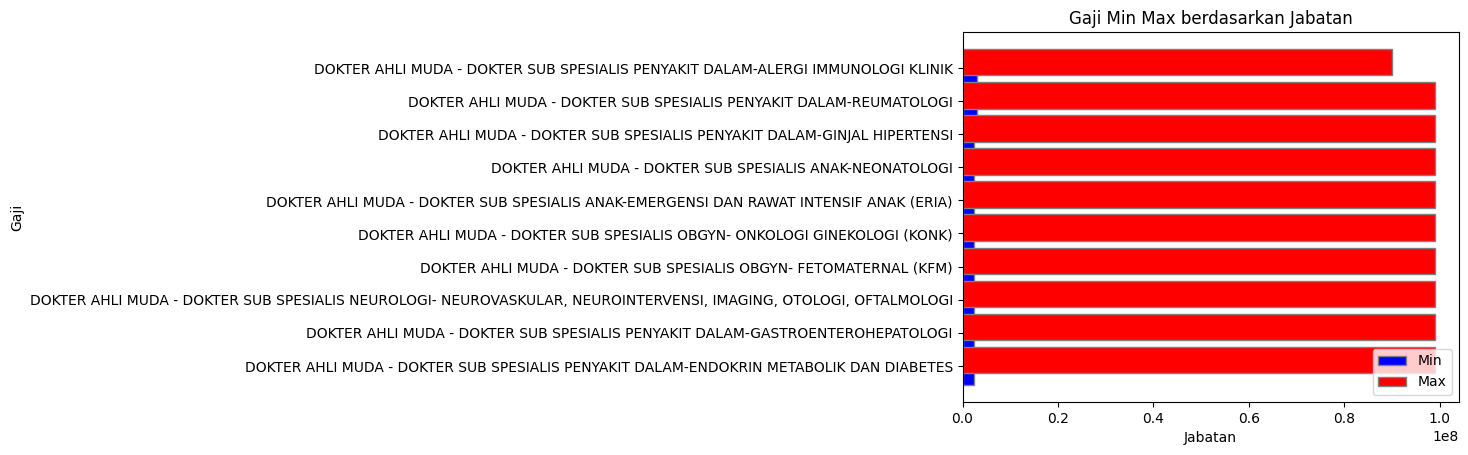

In [9]:
# group by jabatan and find the min and max salary
salaryByJabatan = df_formasi.groupby('jabatan_nm').agg({'gaji_min':'min', 'gaji_max':'max'})
salaryByJabatan.to_csv('output/salaryMinMaxByJabatan.csv')
salaryByJabatanMax = salaryByJabatan.sort_values(by='gaji_max', ascending=False)
# just take the top 10
salaryByJabatanMax = salaryByJabatanMax[:10]
salaryByJabatanMax = salaryByJabatanMax.reset_index()
salaryByJabatanMax['name'] = salaryByJabatanMax['jabatan_nm']
salaryByJabatanMax['min'] = salaryByJabatanMax['gaji_min']
salaryByJabatanMax['max'] = salaryByJabatanMax['gaji_max']
salaryByJabatanMax = salaryByJabatanMax[{'name', 'min', 'max'}]
salaryByJabatanMax.to_json('output/web/salaryMinMaxByJabatanMax.json', orient='records')
# Plot the graph
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(salaryByJabatanMax))
r2 = [x + barWidth for x in r1]
plt.barh(r1, salaryByJabatanMax['min'], color='b', edgecolor='grey', label='Min')
plt.barh(r2, salaryByJabatanMax['max'], color='r', edgecolor='grey', label='Max')
plt.xlabel('Jabatan')
plt.ylabel('Gaji')
plt.title('Gaji Min Max berdasarkan Jabatan')
plt.yticks([r + barWidth/2 for r in range(len(salaryByJabatanMax))], salaryByJabatanMax['name'])
plt.legend()

#### Gaji Minimum Tertinggi Berdasarkan Jabatan

Text(0.5, 0, 'Juta')

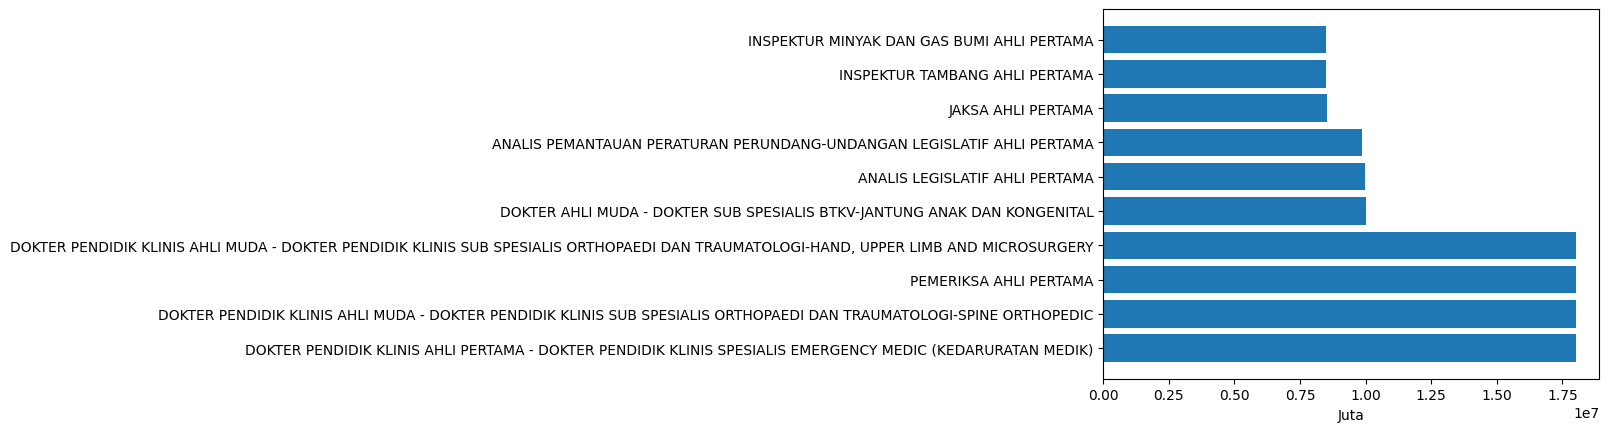

In [10]:
salaryByJabatanMin = salaryByJabatan.sort_values(by='gaji_min', ascending=False)
salaryByJabatanMin = salaryByJabatanMin[:10]
salaryByJabatanMin = salaryByJabatanMin.reset_index()
salaryByJabatanMin['name'] = salaryByJabatanMin['jabatan_nm']
salaryByJabatanMin['value'] = salaryByJabatanMin['gaji_min']

salaryByJabatanMin = salaryByJabatanMin[{'name', 'value'}]
salaryByJabatanMin.to_json('output/web/salaryMinMaxByJabatanMin.json', orient='records')
plt.barh(salaryByJabatanMin['name'][:10], salaryByJabatanMin['value'])
plt.xlabel('Juta')

### Salary Minimum dan Maximum Berdasarkan Pendidikan 

#### Range Salary Berdasarkan Pendidikan - Diurutkan Berdasarkan Salary Tertinggi

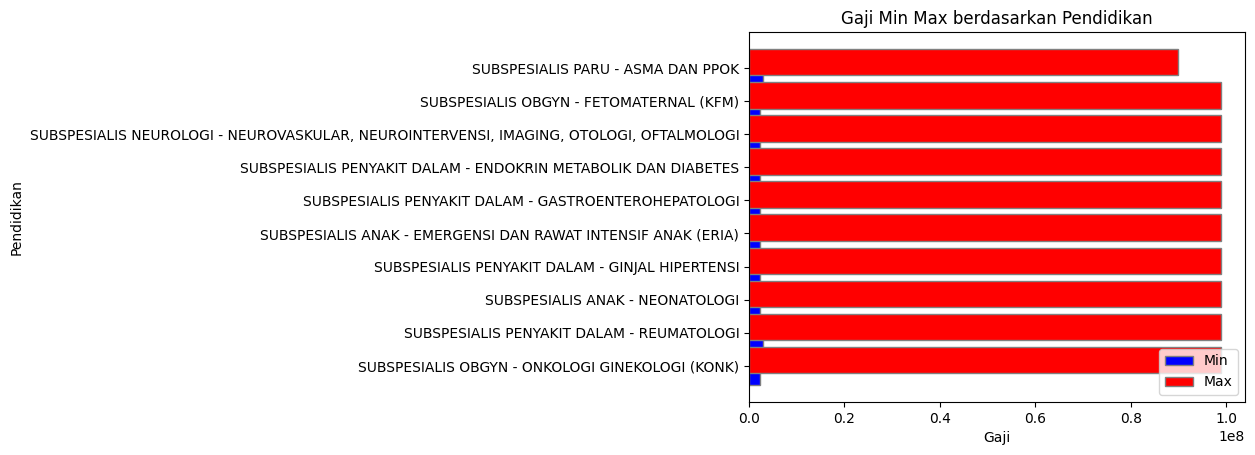

In [11]:
df_pendidikan_salary = df_pendidikan.copy()
df_formasi_salary = df_formasi.copy()
df_pendidikan_salary['cepat_kode'] = df_pendidikan_salary['cepat_kode'].astype(str)
df_formasi_salary['kode_ref_pend'] = df_formasi_salary['kode_ref_pend'].astype(str)
df_formasi_expanded = df_formasi_salary.assign(
    kode_ref_pend=df_formasi_salary['kode_ref_pend'].str.split(' / ')
).explode('kode_ref_pend')
filtered_formasi = df_formasi_expanded[
    df_formasi_expanded['kode_ref_pend'].isin(df_pendidikan_salary['cepat_kode'])
]
grouped_salary = filtered_formasi.groupby('kode_ref_pend').agg({
    'gaji_min': 'min',
    'gaji_max': 'max'
}).reset_index()
df_pendidikan_salary = df_pendidikan_salary.merge(
    grouped_salary, left_on='cepat_kode', right_on='kode_ref_pend', how='left'
)
df_pendidikan_salary['gaji_min'].fillna(0, inplace=True)
df_pendidikan_salary['gaji_max'].fillna(0, inplace=True)
salaryByPendidikan = df_pendidikan_salary.sort_values(by='gaji_max', ascending=False)
salaryByPendidikan.to_csv('output/salaryMinMaxByPendidikan.csv', index=False)
salaryBypendidikanMax = salaryByPendidikan.head(10)
salaryBypendidikanMax = salaryBypendidikanMax.reset_index(drop=True)
salaryBypendidikanMax = salaryBypendidikanMax[['nama', 'gaji_min', 'gaji_max']]
# rename columns
salaryBypendidikanMax['name'] = salaryBypendidikanMax['nama']
salaryBypendidikanMax['min'] = salaryBypendidikanMax['gaji_min']
salaryBypendidikanMax['max'] = salaryBypendidikanMax['gaji_max']
salaryBypendidikanMax = salaryBypendidikanMax[['name', 'min', 'max']]
salaryBypendidikanMax.to_json('output/web/salaryMinMaxByPendidikanMax.json', orient='records')
# Plot
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(salaryBypendidikanMax))
r2 = [x + barWidth for x in r1]
plt.barh(r1, salaryBypendidikanMax['min'], color='b', edgecolor='grey', label='Min')
plt.barh(r2, salaryBypendidikanMax['max'], color='r', edgecolor='grey', label='Max')
plt.xlabel('Gaji')
plt.ylabel('Pendidikan')
plt.title('Gaji Min Max berdasarkan Pendidikan')
plt.yticks([r + barWidth / 2 for r in range(len(salaryBypendidikanMax))], salaryBypendidikanMax['name'])
plt.legend()
plt.show()

#### Gaji Minimum Tertinggi Berdasarkan Pendidikan

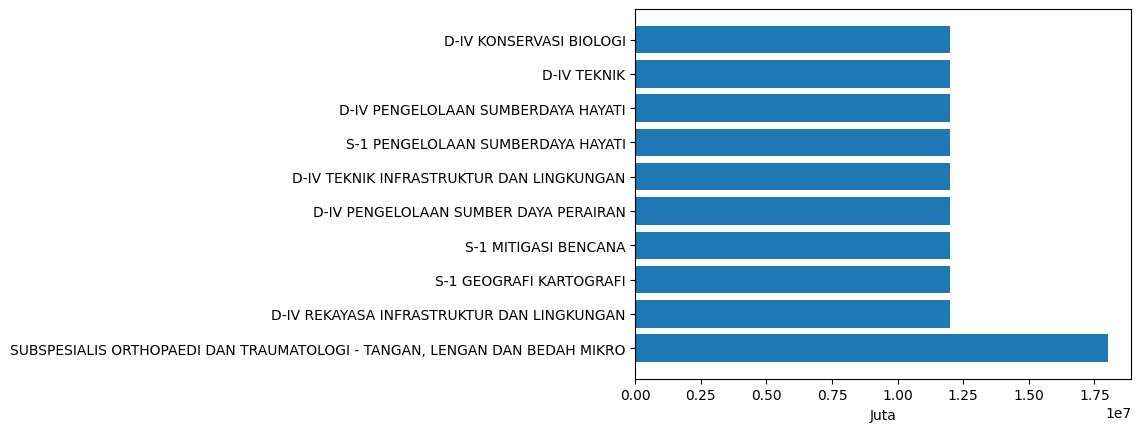

In [12]:
salaryByPendidikanMin = df_pendidikan_salary.sort_values(by='gaji_min', ascending=False)
salaryByPendidikanMin = salaryByPendidikanMin[:10]
salaryByPendidikanMin = salaryByPendidikanMin.reset_index()
salaryByPendidikanMin['name'] = salaryByPendidikanMin['nama']
salaryByPendidikanMin['value'] = salaryByPendidikanMin['gaji_min']
salaryByPendidikanMin = salaryByPendidikanMin[{'name', 'value'}]
salaryByPendidikanMin.to_json('output/web/salaryMinMaxByPendidikanMin.json', orient='records')
plt.barh(salaryByPendidikanMin['name'][:10], salaryByPendidikanMin['value'])
plt.xlabel('Juta')
plt.show()

## Salary Average

### Rata-rata Salary Berdasarkan Jabatan

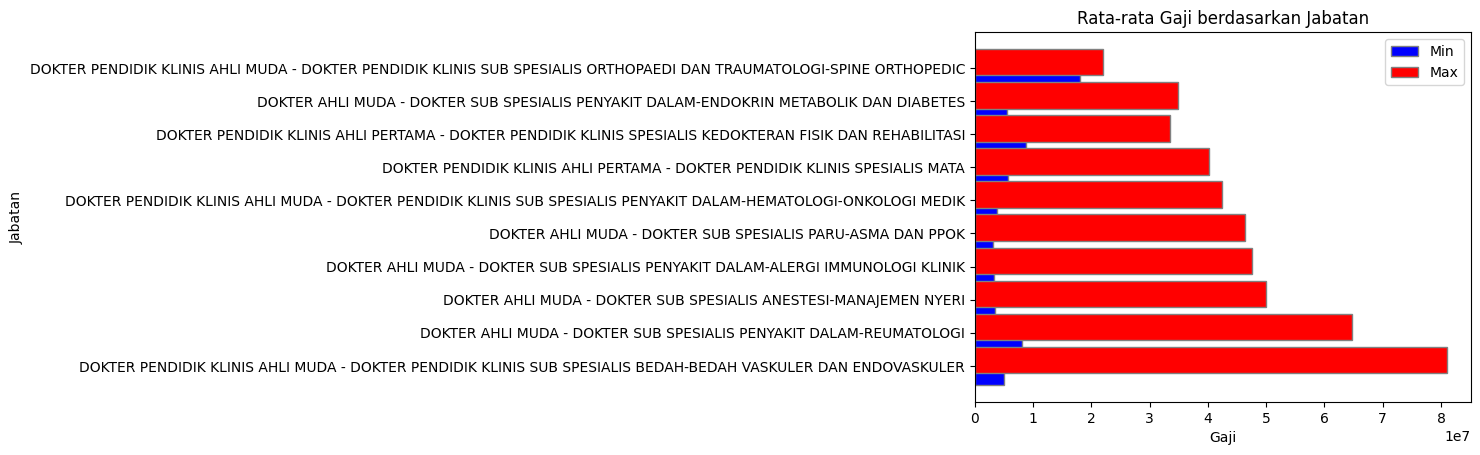

In [13]:
group_jabatan = df_formasi.groupby('jabatan_nm')
mean_gaji_min = group_jabatan['gaji_min'].mean()
mean_gaji_max = group_jabatan['gaji_max'].mean()
mean_gaji = (mean_gaji_min + mean_gaji_max) / 2
meanGajiByJabatan = pd.DataFrame({
    'jabatan_nm': mean_gaji.index,
    'mean_gaji': mean_gaji.values,
    'mean_gaji_min': mean_gaji_min.values,
    'mean_gaji_max': mean_gaji_max.values
})
meanGajiByJabatan = meanGajiByJabatan.sort_values(by='mean_gaji', ascending=False)
meanGajiByJabatan.to_csv('output/meanGajiByJabatan.csv', index=False)
meanGajiByJabatanTop10 = meanGajiByJabatan[:10]
meanGajiByJabatanTop10 = meanGajiByJabatanTop10.reset_index(drop=True)
meanGajiByJabatanTop10['name'] = meanGajiByJabatanTop10['jabatan_nm']
meanGajiByJabatanTop10['min'] = meanGajiByJabatanTop10['mean_gaji_min']
meanGajiByJabatanTop10['max'] = meanGajiByJabatanTop10['mean_gaji_max']
meanGajiByJabatanTop10 = meanGajiByJabatanTop10[['name', 'min', 'max']]
meanGajiByJabatanTop10.to_json('output/web/meanGajiByJabatan.json', orient='records')
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(meanGajiByJabatanTop10))
r2 = [x + barWidth for x in r1]
plt.barh(r1, meanGajiByJabatanTop10['min'], color='b', edgecolor='grey', label='Min')
plt.barh(r2, meanGajiByJabatanTop10['max'], color='r', edgecolor='grey', label='Max')
plt.xlabel('Gaji')
plt.ylabel('Jabatan')
plt.title('Rata-rata Gaji berdasarkan Jabatan')
plt.yticks([r + barWidth / 2 for r in range(len(meanGajiByJabatanTop10))], meanGajiByJabatanTop10['name'])
plt.legend()
plt.show()

### Rata-rata Salary Berdasarkan Instansi   

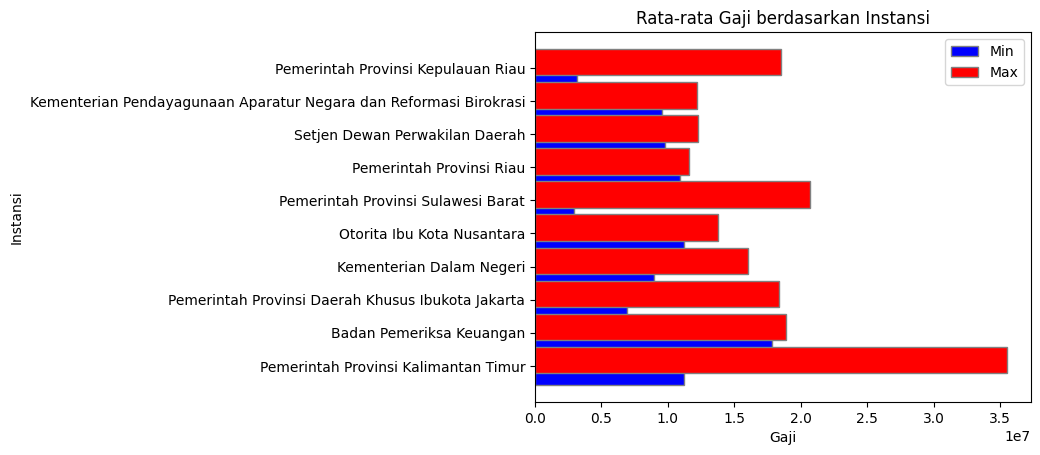

In [14]:
group_instansi = df_formasi.groupby('ins_nm')
mean_gaji_min = group_instansi['gaji_min'].mean()
mean_gaji_max = group_instansi['gaji_max'].mean()
mean_gaji = (mean_gaji_min + mean_gaji_max) / 2
meanGajiByInstansi = pd.DataFrame({
    'ins_nm': mean_gaji.index,
    'mean_gaji': mean_gaji.values,
    'mean_gaji_min': mean_gaji_min.values,
    'mean_gaji_max': mean_gaji_max.values
})
meanGajiByInstansi = meanGajiByInstansi.sort_values(by='mean_gaji', ascending=False)
meanGajiByInstansi.to_csv('output/meanGajiByInstansi.csv', index=False)
meanGajiByInstansiTop10 = meanGajiByInstansi[:10]
meanGajiByInstansiTop10 = meanGajiByInstansiTop10.reset_index(drop=True)
meanGajiByInstansiTop10['name'] = meanGajiByInstansiTop10['ins_nm']
meanGajiByInstansiTop10['min'] = meanGajiByInstansiTop10['mean_gaji_min']
meanGajiByInstansiTop10['max'] = meanGajiByInstansiTop10['mean_gaji_max']
meanGajiByInstansiTop10 = meanGajiByInstansiTop10[['name', 'min', 'max']]
meanGajiByInstansiTop10.to_json('output/web/meanGajiByInstansi.json', orient='records')
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(meanGajiByInstansiTop10))
r2 = [x + barWidth for x in r1]
plt.barh(r1, meanGajiByInstansiTop10['min'], color='b', edgecolor='grey', label='Min')
plt.barh(r2, meanGajiByInstansiTop10['max'], color='r', edgecolor='grey', label='Max')
plt.xlabel('Gaji')
plt.ylabel('Instansi')
plt.title('Rata-rata Gaji berdasarkan Instansi')
plt.yticks([r + barWidth / 2 for r in range(len(meanGajiByInstansiTop10))], meanGajiByInstansiTop10['name'])
plt.legend()
plt.show()


### Rata-rata Salary Berdasarkan Pendidikan

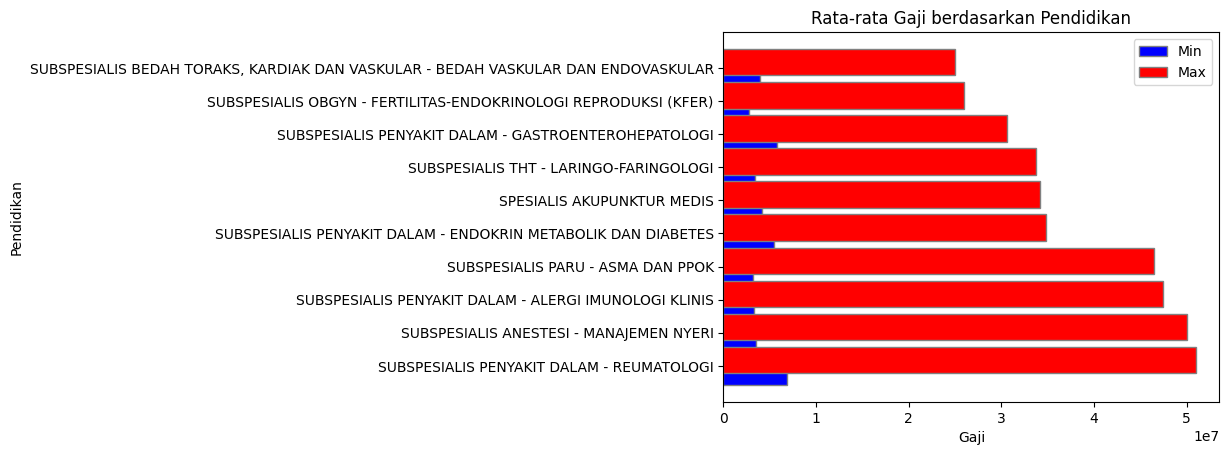

In [15]:
meanGajiByPendidikan = df_pendidikan.copy()
df_formasi_mean_gaji = df_formasi.copy()
meanGajiByPendidikan['cepat_kode'] = meanGajiByPendidikan['cepat_kode'].astype(str)
df_formasi_mean_gaji['kode_ref_pend'] = df_formasi_mean_gaji['kode_ref_pend'].astype(str)
df_formasi_expanded = df_formasi_mean_gaji.assign(
    kode_ref_pend=df_formasi_mean_gaji['kode_ref_pend'].str.split(' / ')
).explode('kode_ref_pend')
filtered_formasi = df_formasi_expanded[
    df_formasi_expanded['kode_ref_pend'].isin(meanGajiByPendidikan['cepat_kode'])
]
grouped_salary = filtered_formasi.groupby('kode_ref_pend').agg({
    'gaji_min': 'mean',
    'gaji_max': 'mean'
}).reset_index()
meanGajiByPendidikan = meanGajiByPendidikan.merge(
    grouped_salary, left_on='cepat_kode', right_on='kode_ref_pend', how='left'
)
meanGajiByPendidikan['gaji_min'].fillna(0, inplace=True)
meanGajiByPendidikan['gaji_max'].fillna(0, inplace=True)
meanGajiByPendidikan = meanGajiByPendidikan.sort_values(by='gaji_max', ascending=False)
meanGajiByPendidikan.to_csv('output/meanGajiByPendidikan.csv', index=False)
meanGajiByPendidikanTop10 = meanGajiByPendidikan.head(10)
meanGajiByPendidikanTop10 = meanGajiByPendidikanTop10.reset_index(drop=True)
meanGajiByPendidikanTop10 = meanGajiByPendidikanTop10[['nama', 'gaji_min', 'gaji_max']]
# rename columns
meanGajiByPendidikanTop10['name'] = meanGajiByPendidikanTop10['nama']
meanGajiByPendidikanTop10['min'] = meanGajiByPendidikanTop10['gaji_min']
meanGajiByPendidikanTop10['max'] = meanGajiByPendidikanTop10['gaji_max']
meanGajiByPendidikanTop10 = meanGajiByPendidikanTop10[['name', 'min', 'max']]
meanGajiByPendidikanTop10.to_json('output/web/meanGajiByPendidikanMax.json', orient='records')
# Plot
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(meanGajiByPendidikanTop10))
r2 = [x + barWidth for x in r1]
plt.barh(r1, meanGajiByPendidikanTop10['min'], color='b', edgecolor='grey', label='Min')
plt.barh(r2, meanGajiByPendidikanTop10['max'], color='r', edgecolor='grey', label='Max')
plt.xlabel('Gaji')
plt.ylabel('Pendidikan')
plt.title('Rata-rata Gaji berdasarkan Pendidikan')
plt.yticks([r + barWidth / 2 for r in range(len(meanGajiByPendidikanTop10))], meanGajiByPendidikanTop10['name'])
plt.legend()
plt.show()


## Summary

### Summary Jabatan

In [16]:
mergedJabatan = sumFormasiByJabatan.merge(salaryByJabatan, on='jabatan_nm')
mergedJabatan = mergedJabatan.merge(meanGajiByJabatan, on='jabatan_nm')
mergedJabatan.to_csv('output/mergedJabatan.csv', index=False)

### Summary Instansi

In [17]:
mergedInstansi = sumFormasiByInstansi.merge(salaryByInstansi, on='ins_nm')
mergedInstansi = mergedInstansi.merge(meanGajiByInstansi, on='ins_nm')
mergedInstansi.to_csv('output/mergedInstansi.csv', index=False)

### Summary Pendidikan

In [18]:
mergedPendidikan = sumFormasiByPendidikan.merge(df_pendidikan_salary, left_on='nama', right_on='nama')
mergedPendidikan = mergedPendidikan.merge(meanGajiByPendidikan, left_on='nama', right_on='nama')